In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import pandas as pd
from IPython.display import display

## Milita.csv

In [63]:
df = pd.read_csv("concat_df_militia.csv")
pd.set_option('display.max_columns', None)
df.head(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,inter1,interaction,region,country,admin1,admin2,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,533240,566,NIG8502,8502,2015-12-13,2015,1,Violence against civilians,Fulani Ethnic Militia (Nigeria),4,47,Western Africa,Nigeria,Plateau,Jos South,Zawan,9.7500,8.8667,1,Vanguard (Lagos),Subnational,At least 14 people were reportedly killed and ...,14,1518765568,NGA
1,533203,566,NIG8466,8466,2015-06-12,2015,1,Battle-No change of territory,Fulani Ethnic Militia (Nigeria),4,44,Western Africa,Nigeria,Benue,Oju,Oju,6.8454,8.4174,2,This Day (Lagos),Subnational,A bloody clash between Fulani herdsmen and far...,6,1518765568,NGA
2,533199,566,NIG8461,8461,2015-05-12,2015,1,Violence against civilians,Fulani Ethnic Militia (Nigeria),4,47,Western Africa,Nigeria,Delta,Ndokwa West,Onicha,5.8288,6.3929,1,The Sun (Nigeria),National,Fulanis kidnap three contractors in Onicha on ...,0,1518765568,NGA


In [32]:
df.sample(1)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,inter1,interaction,region,country,admin1,admin2,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
312,1365545,566,NIG11649,11649,03 January 2018,2018,2,Battle-No change of territory,Fulani Ethnic Militia (Nigeria),4,44,Western Africa,Nigeria,Nasarawa,Keana,Keana,8.1333,8.8,2,Vanguard (Lagos),National,Fulani militia allegedly kill three Tiv farmer...,0,1524053830,NGA


In [23]:
df.shape

(320, 25)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           320 non-null    int64  
 1   iso               320 non-null    int64  
 2   event_id_cnty     320 non-null    object 
 3   event_id_no_cnty  320 non-null    int64  
 4   event_date        320 non-null    object 
 5   year              320 non-null    int64  
 6   time_precision    320 non-null    int64  
 7   event_type        320 non-null    object 
 8   actor1            320 non-null    object 
 9   inter1            320 non-null    int64  
 10  interaction       320 non-null    int64  
 11  region            320 non-null    object 
 12  country           320 non-null    object 
 13  admin1            320 non-null    object 
 14  admin2            320 non-null    object 
 15  location          320 non-null    object 
 16  latitude          320 non-null    float64
 1

In [26]:
df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'actor1', 'inter1',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'location',
       'latitude', 'longitude', 'geo_precision', 'source', 'source_scale',
       'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [66]:
print(df['actor1'].unique())
print(df['region'].unique())
print(df['event_type'].unique())
print(df['iso3'].unique())
print(df['source_scale'].unique()) 
print("---",df['source'].unique()) 
# print(df['admin1'].unique())
# print(df['admin2'].unique())

['Fulani Ethnic Militia (Nigeria)']
['Western Africa']
['Violence against civilians' 'Battle-No change of territory'
 'Strategic development' 'Headquarters or base established'
 'Remote violence']
['NGA']
['Subnational' 'National' 'International' 'Other' 'National-International'
 'Other-National' 'National-international' 'Other-national'
 'Subnational-national']
--- ['Vanguard (Lagos)' 'This Day (Lagos)' 'The Sun (Nigeria)'
 'Leadership (Abuja)' 'The Nation (Nigeria)' 'The Guardian (Nigeria)'
 'Daily Independent (Nigeria)' 'Daily Leadership (Nigeria)'
 'Agence France Presse' 'Daily Trust (Abuja)' 'Nigerian Tribune'
 'Daily Independent (Lagos)' 'PM News' 'Weekly Trust' 'Nigeria Sun'
 'The Guardian (Lagos)' 'Premium Times (Abuja)' 'Nigeria Punch'
 'The Guardian' 'Twitter Source' 'Local Source Project'
 'This Day (Lagos); The Sun (Nigeria); Vanguard (Lagos)'
 'Vanguard (Lagos); The Sun (Nigeria)'
 'The Guardian (Lagos); The Nation (Nigeria)'
 'Vanguard (Lagos); Daily Trust (Abuja)' 'Agenc

In [48]:
print(df['location'].unique())

['Zawan' 'Oju' 'Onicha' 'Polapindi' 'Ofagbe' 'Afuze' 'Dekina' 'Agojeju'
 'Wukari' 'Barkin Ladi' 'Kagara' 'Kabba' 'Alawa' 'Kadunu' 'Ibi' 'Tafan'
 'Foron' 'Kwale' 'Ikare-Akoko' 'Obi' 'Dengi' 'Pategi' 'Ukura' 'Ugba'
 'Iorzaa' 'Gusa' 'Naka' 'Wase' 'Ropp' 'Adikpo' 'Obangedde' 'Kambari'
 'Riyom' 'Gbajimba' 'Gbanu' 'Donga' 'Aro' 'Kulungu' 'Tsevii' 'Agberga'
 'Abur' 'Ananum' 'Udi' 'Egbla' 'Yangal' 'Ukum' 'Asa' 'Bokkos' 'Tseshigbe'
 'Tsemue' 'Tsechebe' 'Orogba' 'Mgbekpa' 'Okokolo' 'Abugbe' 'Kenti'
 'Lokoja' 'Zankan' 'Mongu' 'Dowaya' 'Tseaudu' 'Keana' 'Tombo' 'Arigidi'
 'Kwal' 'Iwo' 'Nassarawa' 'Mutum Biyu' 'Udegi' 'Onicha-Olona' 'Gampu'
 'Tseaondo' 'Issele-Uku' 'Gashit' 'Barikin Ladi' 'Bukuru' 'Anyiin'
 'Jalingo' 'Ado-Ekiti' 'Yorro' 'Katsina-Ala' 'Aliade' 'Makurdi' 'Isu'
 'Iyara' 'Awka' 'Lau' 'Enugu' 'Numan' 'Gwaska' 'Bolki' 'Agagbe' 'Awe'
 'Agasha' 'Miango' 'Zambana' 'Umuachi-Ator' 'Doma' 'Oloworu' 'Tse Akanga'
 'Zaki Biam' 'Nteje' 'Kadarko' 'Aloshi' 'Samaru' 'Jemaa' 'Enger' 'Takum'
 'Mbara' '

(array([151.,  11.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

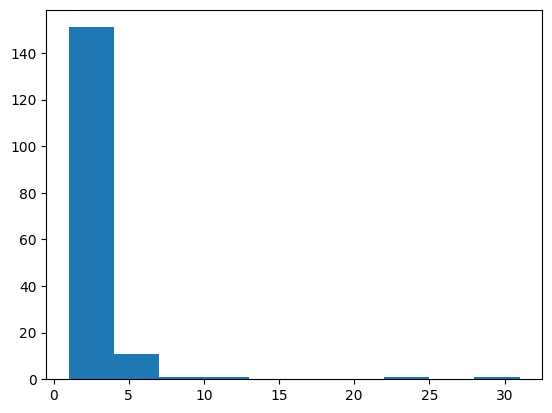

In [51]:
plt.hist(df['location'].value_counts())

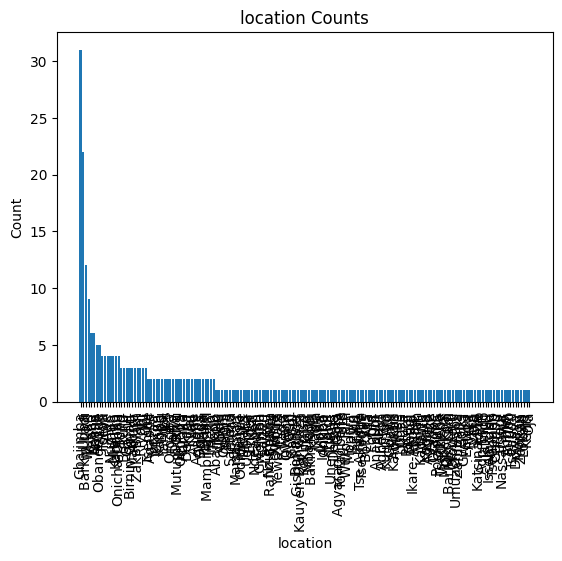

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named "df" with a column named "location"
location_counts = df['location'].value_counts()

# Plot the bar chart
plt.bar(location_counts.index, location_counts.values)

# Add labels and a title to the chart
plt.xlabel('location')
plt.ylabel('Count')
plt.title('location Counts')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()


<BarContainer object of 320 artists>

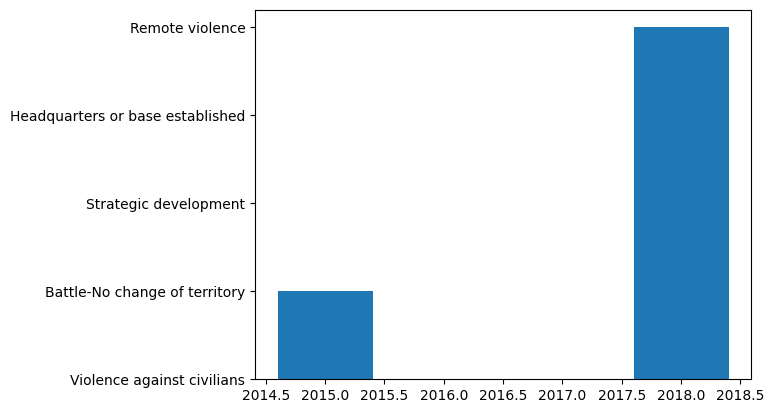

In [57]:
plt.bar(df['year'],df['event_type'])

(array([ 82.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 238.]),
 array([2015. , 2015.3, 2015.6, 2015.9, 2016.2, 2016.5, 2016.8, 2017.1,
        2017.4, 2017.7, 2018. ]),
 <BarContainer object of 10 artists>)

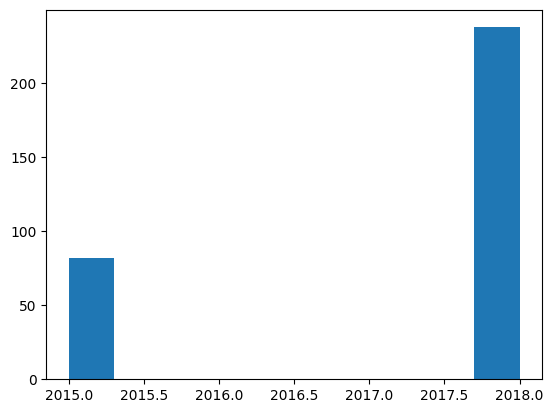

In [58]:
plt.hist(df['year'])

In [59]:
print(df['year'].max())
print(df['year'].min())

2018
2015
